## Prevendo a evolução da COVID - 19 no Brasil

1. Limpas Dados;
2. Filtrar dados apenas do Brasil
3. Fazer Analises.

In [1]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

# Importando Dados

In [2]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

In [3]:
# Importando dados
df = pd.read_csv (url, parse_dates = ['ObservationDate', 'Last Update'])

# Formatando Dados

In [4]:
# Formatando nome das colunas
# Criando um função que ira formatar os dados com base nos paramentos passado em:
# return re.sub(r'[/| ]','', col_name).lower()
import re

def corrige_colunas (col_name):
    return re.sub(r'[/| ]','', col_name).lower()

In [5]:
# Corrigindo todas as Colunas, Excluindo letras maiusculas, caracteres especias e etc...
df.columns = [corrige_colunas(col)for col in df.columns]

# Evolução dos casos no Brasil

In [6]:
# Selecionando apenas dados do Brasil
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [7]:
# Filtrando apenas o periodo em que tivemos pelomenos um caso confirmado
brasil = df.loc [
    (df.countryregion == 'Brazil')&
    (df.confirmed > 0)
]

# Extraindo apenas o pediodo em que tivemos pelomenos um caso de obito
brasil_1 = df.loc [
    (df.countryregion == 'Brazil') &
    (df.confirmed > 0) &
    (df.deaths > 0)
]

display(brasil)
display(brasil_1)

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
6201,6202,2020-03-17,NaN,Brazil,2020-03-17 15:33:06,321.0,1.0,2.0
6476,6477,2020-03-18,NaN,Brazil,2020-03-18 19:14:29,372.0,3.0,2.0
6755,6756,2020-03-19,NaN,Brazil,2020-03-19 20:43:02,621.0,6.0,2.0
7043,7044,2020-03-20,NaN,Brazil,2020-03-20 20:13:16,793.0,11.0,2.0
7337,7338,2020-03-21,NaN,Brazil,2020-03-21 17:43:03,1021.0,15.0,2.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [73]:
# Plotando Gráfico com a evolução dos casos confirmados em relacao aos obitos
fig = go.Figure()

# periodo da var brasil esta filtrando desde o primeiro caso confirmado
fig.add_trace(go.Line(
    x=brasil.observationdate, 
    y=brasil.confirmed,
    name='Confirmados',
    marker_color='indianred'
))
# periodo da var brasil_1 esta filtrando desde o primeiro obito confirmado
fig.add_trace(go.Line(
    x=brasil_1.observationdate, 
    y=brasil_1.deaths,
    name='Obitos',
    marker_color='lightsalmon'
))

# Formatando o gráfico
fig.update_layout(
    title = 'Evolução dos casos confirmados e obitos'
)
fig.show()

## Novos casos por dia

In [ ]:
# Criando uma nova coluna [Novos casos]
# Novos casos = 'ontem' - 'hoje' = quantidade de novos casos
brasil ['novos_casos'] = list(map(
    lambda x: 0 if (x == 0) else brasil ['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange (brasil.shape [0])
))

brasil ['novas_mortes'] = list(map(
    lambda x: 0 if (x == 0) else brasil ['deaths'].iloc[x] - brasil ['deaths'].iloc[x-1],
    np.arange (brasil.shape [0])
))

brasil

In [74]:
# Gráfico interativo com a quantidade de casos confirmados por dia e a quantidade de novos obitos

fig = go.Figure()
fig.add_trace(go.Line(
                x=brasil.observationdate, 
                y=brasil.novos_casos,
                name='Casos Confirmados',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Line(
                x=brasil.observationdate, 
                y=brasil.novas_mortes,
                name='Mortes por Covid',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Novos casos Confirmados e Obitos de Covid - 19 por dia.',
    xaxis_tickfont_size=14,
    yaxis=dict(
        titlefont_size=16,
        tickfont_size=14,
        showgrid=False,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
))
fig.show()

## Taxa de Crescimento 
Taxa de crescimento em todo o periodo avaliado

taxa de crescimento = (presente/passado) ** (1/n) -1

"n" - equivale a numero de dias

In [11]:
def taxa_crescimento (data, variable, data_inicio = None, data_fim = None):
    # Se data inicio for igual a none, sera definido a primeira data disponivel
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0 ].min ()
    else:
        data_inicio = pd.to_datetime (data_inicio)

    # Data fim
    if data_fim == None:
        data_fim = data.observationdate.iloc [-1]
    else:
        data_fim = pd.to_datetime (data_fim)
        
    # Definindo os valores de passado e presente
    passado = data.loc [data.observationdate == data_inicio, variable].values [0]
    presente = data.loc [data.observationdate == data_fim, variable].values [0]
    
    # Definindo o numero de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calculando Taxa
    taxa = (presente/passado)**(1/n) -1
    
    return taxa*100

In [12]:
# Taxa de crescimento medio do Covid no Brasil em todo o periodo
taxa_crescimento (brasil,'confirmed')

16.27183353112116

In [13]:
# Taxa de crescimento diario
def taxa_crescimento_diario (data, variable, data_inicio = None):
    # Se data inicio for igual a none, sera definido a primeira data disponivel
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0 ].min ()
    else:
        data_inicio = pd.to_datetime (data_inicio)
    
    data_fim = data.observationdate.max()
    
    # Definindo o numero de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range (1, n+1)
    ))
    return np.array (taxas) * 100

In [14]:
tx_dia = taxa_crescimento_diario (brasil,'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [15]:
# Plotando gráfico
primeiro_dia = brasil.observationdate.loc [brasil.confirmed > 0].min()

fig = px.line(
    x = pd.date_range (primeiro_dia, brasil.observationdate.max()) [1:],
    y = tx_dia,
    
)

fig.update_layout(
    title = 'Taxa de crescimento por dia',  
    xaxis_title='Dias',
    yaxis_title='Taxa de crescimento %',
)

fig.show()

# Por que a taxa de crescimento diminui ?
por que o volume de infectados so aumenta durante o dia, oque faz com que o numero de infectados sempre esteje alto e com pouca variação

# Predições

In [16]:
# importando Bibliotecas
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [17]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [18]:
res = seasonal_decompose (confirmados)

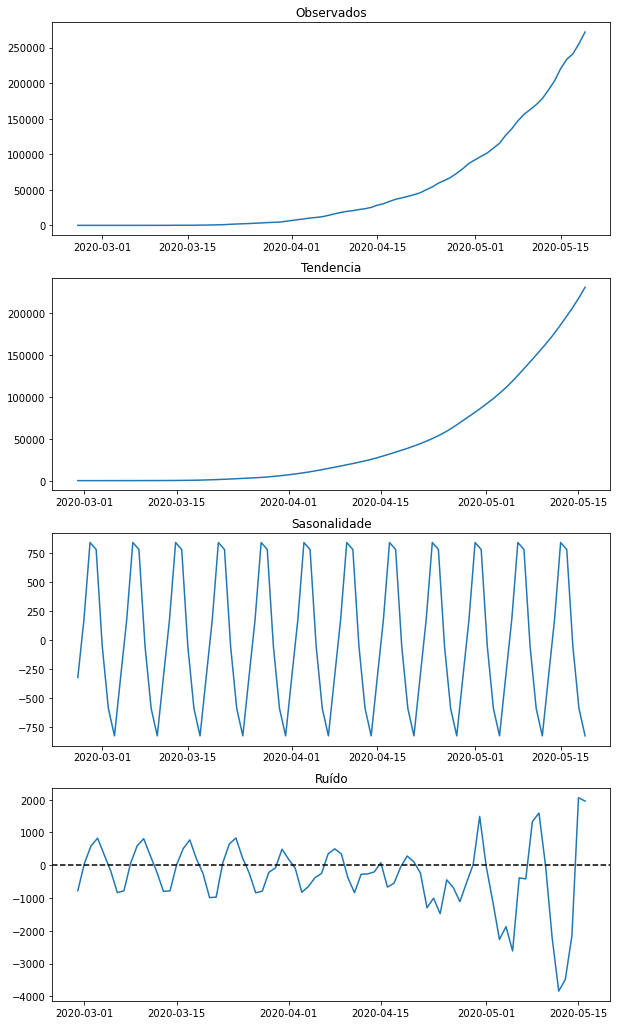

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots (4,1, figsize =(10,18), facecolor = ('White'))

# Observados
ax1.plot (res.observed)
ax1.set_title ('Observados')
# Tendencia
ax2.plot (res.trend)
ax2.set_title ('Tendencia')

# Sasonalidade
ax3.plot (res.seasonal)
ax3.set_title ('Sasonalidade')

# Ruído
ax4.plot (confirmados.index, res.resid)
ax4.set_title ('Ruído')
ax4.axhline (0, linestyle = 'dashed', c = 'black')


## ARIMA


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
modelo = auto_arima (confirmados)

In [34]:
# Dados observados
fig = go.Figure (go.Scatter(
    x = confirmados.index,
    y = confirmados,
    name = 'Observados'
))

# Criando Predições
fig.add_trace (go.Scatter(
 x = confirmados.index,
    y = modelo.predict_in_sample(),
    name = 'Preditos'
))

# Prevendo os proximos 30 dias
# Quanto maior o tempo de previsão, maior a incerteza dos dados
fig.add_trace (go.Scatter(
    x = pd.date_range ('2020-05-20', '2020-06-20'),
    y = modelo.predict (31),
    name = 'Forecast'
))

fig.update_layout (
    title = 'Previsão de casos confirmados no Brasil para os proximos 30 dias'
)
fig.show()

# Em Azul temos os dados observados
# Em Laranja temos os dados preditos, o que foi aprendido pela maquina
# Em verde temos previsão

# Modelo de Crescimeto
Irei usar a biblioteca fbphophet

In [ ]:
# Metodo mais facil de se intalar o fbprophet sem erros
!conda install -c conda-forge fbprophet -y

In [69]:
from prophet import Prophet

In [70]:
# Peparando os dados
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# Renomeia colunas
train.rename(
    columns={"observationdate":"ds","confirmed":"y"},
    inplace=True)

test.rename(
    columns={"observationdate":"ds","confirmed":"y"},
    inplace=True)

test = test.set_index("ds")
test = test['y']

profeta = Prophet(
    growth="logistic", # Regressão logistica emtima uma função de sigmoide
    changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])
    # 4 pontos em que tivemos uma mudança brusca

# Cenario onde 100% da população é contaminada 
# Em pop podemos definir varios cenario ipoteticos de limite de contaminação
pop = 215341020 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200) # prevendo os proximos 200 dias
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates) # Linha de Predição

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [71]:
# Plotando Gráfico

fig = go.Figure ()

fig.add_trace (go.Scatter(
    x = forecast.ds,
    y = forecast.yhat,
    name = 'Predição'
))

fig.add_trace (go.Scatter(
    x = train.ds,
    y = train.y,
    name = 'Observados - Treino'
))

fig.update_layout (title = 'Predição de casos de Covid-19 no Brasil')
fig.show()

# Se a capacidade de infecção fosse o limite de população a curva ira se estabilizar em novembro